In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
plt.style.use('ggplot')

# Data cleaning

## 1. Tổng hợp dữ liệu

In [219]:
symbolData = pd.read_csv('symbol.csv')
symbolData

,Symbol,CompanyName
0,AAPL,Apple Inc
1,MSFT,Microsoft Corp.
2,GOOG,Alphabet Inc (Google) Class C
3,AMZN,"Amazon.com, Inc."
4,BRK.A,Berkshire Hathaway Inc.
...,...,...
95,VRTX,Vertex Pharmaceuticals Incorporated
96,EOG,"EOG Resources, Inc."
97,BKNG,Booking Holdings Inc. Common Stock
98,PGR,Progressive Corporation (The)


In [220]:
marketData = pd.read_csv('market.csv')
marketData

,Ticker,Market cap,Price,Chg % 1D,Chg 1D,Technical Rating 1D,Vol 1D,Volume * Price 1D,P/E(TTM),EPS(TTM),Employees,Sector
0,AAPLApple Inc,2.351TUSD,147.81USD,−0.34%,−0.50USD,Neutral,65.446M,9.674B,24.30,6.14USD,164K,Electronic Technology
1,MSFTMicrosoft Corp.,1.901TUSD,255.02USD,0.13%,0.33USD,Buy,21.528M,5.49B,27.45,9.33USD,221K,Technology Services
2,GOOGAlphabet Inc (Google) Class C,1.303TUSD,100.83USD,−0.44%,−0.45USD,Buy,18.821M,1.898B,20.38,5.09USD,156.5K,Technology Services
3,"AMZNAmazon.com, Inc.",960.282BUSD,94.13USD,−1.43%,−1.37USD,Sell,72.496M,6.824B,87.70,1.11USD,1.608M,Retail Trade
4,BRK.ABerkshire Hathaway Inc.,696.418BUSD,477402.98USD,0.07%,317.98USD,Buy,2.794K,1.334B,—,−1194.00USD,372K,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
95,VRTXVertex Pharmaceuticals Incorporated,82.493BUSD,321.37USD,0.19%,0.61USD,Buy,1.095M,351.862M,25.32,12.81USD,3.9K,Health Technology
96,"EOGEOG Resources, Inc.",81.63BUSD,138.97USD,−1.12%,−1.57USD,Neutral,3.933M,546.506M,11.04,12.82USD,2.8K,Energy Minerals
97,BKNGBooking Holdings Inc. Common Stock,80.893BUSD,2085.44USD,1.22%,25.15USD,Buy,270.497K,564.105M,33.83,61.20USD,20.3K,Consumer Services
98,PGRProgressive Corporation (The),77.528BUSD,132.51USD,0.95%,1.25USD,Strong Buy,1.253M,166.066M,92.89,1.42USD,49.077K,Finance


In [221]:
marketData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ticker               100 non-null    object
 1   Market cap           100 non-null    object
 2   Price                100 non-null    object
 3   Chg % 1D             100 non-null    object
 4   Chg 1D               100 non-null    object
 5   Technical Rating 1D  100 non-null    object
 6   Vol 1D               100 non-null    object
 7   Volume * Price 1D    100 non-null    object
 8   P/E(TTM)             100 non-null    object
 9   EPS(TTM)             100 non-null    object
 10  Employees            100 non-null    object
 11  Sector               100 non-null    object
dtypes: object(12)
memory usage: 9.5+ KB


Chúng ta có thể thấy các dữ liệu vẫn còn đều ở dạng `object`, chúng ta cần chuyển chúng về kiểu dữ liệu cho phù hợp từng cột

In [222]:
symbolData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Symbol       100 non-null    object
 1   CompanyName  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [223]:
marketData = marketData.drop(['P/E(TTM)', 'EPS(TTM)', 'Technical Rating 1D', 'Ticker'], axis=1)
marketData

,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,2.351TUSD,147.81USD,−0.34%,−0.50USD,65.446M,9.674B,164K,Electronic Technology
1,1.901TUSD,255.02USD,0.13%,0.33USD,21.528M,5.49B,221K,Technology Services
2,1.303TUSD,100.83USD,−0.44%,−0.45USD,18.821M,1.898B,156.5K,Technology Services
3,960.282BUSD,94.13USD,−1.43%,−1.37USD,72.496M,6.824B,1.608M,Retail Trade
4,696.418BUSD,477402.98USD,0.07%,317.98USD,2.794K,1.334B,372K,Finance
...,...,...,...,...,...,...,...,...
95,82.493BUSD,321.37USD,0.19%,0.61USD,1.095M,351.862M,3.9K,Health Technology
96,81.63BUSD,138.97USD,−1.12%,−1.57USD,3.933M,546.506M,2.8K,Energy Minerals
97,80.893BUSD,2085.44USD,1.22%,25.15USD,270.497K,564.105M,20.3K,Consumer Services
98,77.528BUSD,132.51USD,0.95%,1.25USD,1.253M,166.066M,49.077K,Finance


- Do dữ liệu chúng ta thu thập có một số thông số không sử dụng đến, nên ta sẽ bỏ đi những cột đó và thay thế cột `Ticker` chúng ta thu thập được bằng dữ liệu file `symbol.csv`, để từ đó có đươc một data hoàn chỉnh. 

In [224]:
marketData.insert(0, "Symbol", symbolData["Symbol"].to_list())
marketData.insert(1, "Company Name", symbolData["CompanyName"].to_list())

In [225]:
data = marketData
data

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2.351TUSD,147.81USD,−0.34%,−0.50USD,65.446M,9.674B,164K,Electronic Technology
1,MSFT,Microsoft Corp.,1.901TUSD,255.02USD,0.13%,0.33USD,21.528M,5.49B,221K,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1.303TUSD,100.83USD,−0.44%,−0.45USD,18.821M,1.898B,156.5K,Technology Services
3,AMZN,"Amazon.com, Inc.",960.282BUSD,94.13USD,−1.43%,−1.37USD,72.496M,6.824B,1.608M,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696.418BUSD,477402.98USD,0.07%,317.98USD,2.794K,1.334B,372K,Finance
...,...,...,...,...,...,...,...,...,...,...
95,VRTX,Vertex Pharmaceuticals Incorporated,82.493BUSD,321.37USD,0.19%,0.61USD,1.095M,351.862M,3.9K,Health Technology
96,EOG,"EOG Resources, Inc.",81.63BUSD,138.97USD,−1.12%,−1.57USD,3.933M,546.506M,2.8K,Energy Minerals
97,BKNG,Booking Holdings Inc. Common Stock,80.893BUSD,2085.44USD,1.22%,25.15USD,270.497K,564.105M,20.3K,Consumer Services
98,PGR,Progressive Corporation (The),77.528BUSD,132.51USD,0.95%,1.25USD,1.253M,166.066M,49.077K,Finance


In [226]:
data.head(10)

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2.351TUSD,147.81USD,−0.34%,−0.50USD,65.446M,9.674B,164K,Electronic Technology
1,MSFT,Microsoft Corp.,1.901TUSD,255.02USD,0.13%,0.33USD,21.528M,5.49B,221K,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1.303TUSD,100.83USD,−0.44%,−0.45USD,18.821M,1.898B,156.5K,Technology Services
3,AMZN,"Amazon.com, Inc.",960.282BUSD,94.13USD,−1.43%,−1.37USD,72.496M,6.824B,1.608M,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696.418BUSD,477402.98USD,0.07%,317.98USD,2.794K,1.334B,372K,Finance
5,TSLA,"Tesla, Inc.",615.32BUSD,194.86USD,0.08%,0.16USD,73.645M,14.35B,99.29K,Consumer Durables
6,UNH,UnitedHealth Group Incorporated,500.961BUSD,536.16USD,−0.14%,−0.75USD,2.346M,1.258B,350K,Health Services
7,JNJ,Johnson & Johnson,467.679BUSD,178.88USD,0.08%,0.14USD,5.824M,1.042B,141.7K,Health Technology
8,XOM,Exxon Mobil Corporation,452.436BUSD,109.86USD,−0.85%,−0.94USD,15.248M,1.675B,63K,Energy Minerals
9,V,Visa Inc.,448.747BUSD,217.66USD,0.30%,0.66USD,5.133M,1.117B,26.5K,Commercial Services


Chúng ta cần chuyển các cột biểu diễn số về với dạng số, để có thể xử lý, tính toán cho các bước sau. Dưới đây là hàm giúp chúng ta chuyển đổi các ô số lớn về dạng làm tròn của chúng.

In [227]:
m = {'K': 3, 'M': 6, 'B': 9, 'T': 12}
def convertBigNumber(data, base):
    if data == '-':
        return data
    elif (data[-1].isalpha()):
        factor = m[data[-1]]
        return float(float(data[:-1]) * (10**(factor-base)))

In [228]:
data['Market cap'] = data['Market cap'].str.replace('USD', '')
data['Price'] = data['Price'].str.replace('USD', '')

data['Chg 1D'] = data['Chg 1D'].str.replace('USD', '')
data['Chg % 1D'] = data['Chg % 1D'].str.replace('%', '')

# Sửa lại kí hiệu do khác biệt về cách thức mã hóa
data['Chg 1D'] = data['Chg 1D'].str.replace('−', '-')
data['Chg % 1D'] = data['Chg % 1D'].str.replace('−', '-')

for i in range(len(data)):
    # Convert to numeric data
    data['Market cap'][i] = convertBigNumber(data['Market cap'][i], 6) # milion USD
    data['Vol 1D'][i] = convertBigNumber(data['Vol 1D'][i], 6) # milion USD
    data['Volume * Price 1D'][i] = convertBigNumber(data['Volume * Price 1D'][i], 6) # milion USD
    data['Employees'][i] = convertBigNumber(data['Employees'][i], 0) # person


# Xóa các dòng chứa các dữ liệu Nan
data = data.replace('—', np.nan)
data = data.dropna(axis='index')
data.to_csv('clean_data.csv')

In [229]:
convert_types = {
    'Market cap': float,
    'Price': float,
    'Vol 1D': float,
    'Volume * Price 1D': float,
    'Employees': int,
    'Chg 1D': float,
    'Chg % 1D': float
}

data = data.astype(convert_types)
data.describe(include='all')

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
count,98,98,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,9.800000e+01,98
unique,98,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
top,AAPL,Apple Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health Technology
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
mean,NaN,NaN,2.494530e+05,5094.341633,-0.043673,3.407347,10.043966,1258.734265,1.564428e+05,NaN
std,NaN,NaN,3.293596e+05,48202.858112,1.317085,32.399345,15.247433,2005.462353,2.948573e+05,NaN
min,NaN,NaN,7.663700e+04,19.020000,-4.930000,-12.730000,0.002794,166.066000,2.800000e+03,NaN
25%,NaN,NaN,1.096565e+05,95.455000,-0.815000,-0.922500,1.950500,478.662000,3.015375e+04,NaN
50%,NaN,NaN,1.531365e+05,160.205000,-0.050000,-0.075000,4.322500,670.129000,7.700000e+04,NaN
75%,NaN,NaN,2.482005e+05,282.690000,0.767500,0.910000,10.156000,1055.500000,1.670000e+05,NaN


In [230]:
data

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2351000.0,147.81,-0.34,-0.50,65.446000,9674.000,164000,Electronic Technology
1,MSFT,Microsoft Corp.,1901000.0,255.02,0.13,0.33,21.528000,5490.000,221000,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1303000.0,100.83,-0.44,-0.45,18.821000,1898.000,156500,Technology Services
3,AMZN,"Amazon.com, Inc.",960282.0,94.13,-1.43,-1.37,72.496000,6824.000,1608000,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696418.0,477402.98,0.07,317.98,0.002794,1334.000,372000,Finance
...,...,...,...,...,...,...,...,...,...,...
95,VRTX,Vertex Pharmaceuticals Incorporated,82493.0,321.37,0.19,0.61,1.095000,351.862,3900,Health Technology
96,EOG,"EOG Resources, Inc.",81630.0,138.97,-1.12,-1.57,3.933000,546.506,2800,Energy Minerals
97,BKNG,Booking Holdings Inc. Common Stock,80893.0,2085.44,1.22,25.15,0.270497,564.105,20300,Consumer Services
98,PGR,Progressive Corporation (The),77528.0,132.51,0.95,1.25,1.253000,166.066,49077,Finance


# Data exploratory

## 1. Dữ liệu chung về thị trường

+ `Symbol`: Mã chứng khoán của công ty trên sàn
+ `Company` Name: Tên của công ty chủ quản
+ `Price`: Giá đóng cửa có điều chỉnh của công ty trên sàn
+ `Chg % 1D`: Tỉ lệ thay đổi trên giá trong ngày gần nhất
+ `Chg 1D`: Giá thay đổi trên giá trong ngày gần nhất
+ `Vol 1D`: Lượng giao dịch trên sàn trong ngày gần nhất
+ `Vol * Price 1D`: Giá trị giao dịch trên sàn trong ngày gần nhất
+ `Employees`: Số lượng nhân viên của công ty 
+ `Sector`: Phân loại ngành của công ty

In [231]:
data.head(10)

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2351000.0,147.81,-0.34,-0.50,65.446000,9674.0,164000,Electronic Technology
1,MSFT,Microsoft Corp.,1901000.0,255.02,0.13,0.33,21.528000,5490.0,221000,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1303000.0,100.83,-0.44,-0.45,18.821000,1898.0,156500,Technology Services
3,AMZN,"Amazon.com, Inc.",960282.0,94.13,-1.43,-1.37,72.496000,6824.0,1608000,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696418.0,477402.98,0.07,317.98,0.002794,1334.0,372000,Finance
5,TSLA,"Tesla, Inc.",615320.0,194.86,0.08,0.16,73.645000,14350.0,99290,Consumer Durables
6,UNH,UnitedHealth Group Incorporated,500961.0,536.16,-0.14,-0.75,2.346000,1258.0,350000,Health Services
7,JNJ,Johnson & Johnson,467679.0,178.88,0.08,0.14,5.824000,1042.0,141700,Health Technology
8,XOM,Exxon Mobil Corporation,452436.0,109.86,-0.85,-0.94,15.248000,1675.0,63000,Energy Minerals
9,V,Visa Inc.,448747.0,217.66,0.30,0.66,5.133000,1117.0,26500,Commercial Services


### 1.1 Số lượng công ty theo ngành

In [232]:
sectors = data['Sector'].unique()
sectors

array(['Electronic Technology', 'Technology Services', 'Retail Trade',
       'Finance', 'Consumer Durables', 'Health Services',
       'Health Technology', 'Energy Minerals', 'Commercial Services',
       'Consumer Non-Durables', 'Consumer Services', 'Communications',
       'Utilities', 'Process Industries', 'Transportation',
       'Producer Manufacturing'], dtype=object)

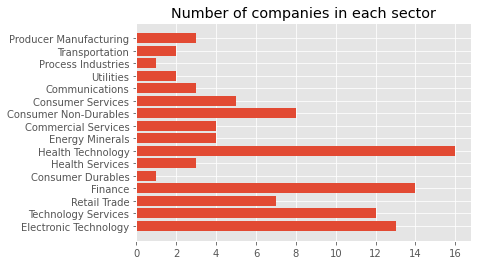

In [233]:
numberOfCompaniesInSector = []
for sector in sectors:
    numberOfCompaniesInSector.append(len(data.loc[data['Sector'] == sector]))

plt.barh(sectors, numberOfCompaniesInSector)
plt.title('Number of companies in each sector')
plt.show()

Từ biểu đồ, ta thấy được có bao nhiêu công ty trên từng sector. Health Technology (Công nghệ y học) đang chiếm một lượng nhiều công ty nhất trong danh sách này, cùng với đó là một số ngành như Finance (Tài chính), Technology Services (Dịch vụ công nghệ), Electronic Technology (Điện tử) cũng chiếm một phần lớn. Trái ngược với đó, ngành Consumer Durables (Hàng hoá cứng) và Process Industries (Công nghiệp chế biến) chỉ có duy nhất 1 công ty trong danh sách này.

In [234]:
data.loc[data['Sector'] == 'Consumer Durables']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
5,TSLA,"Tesla, Inc.",615320.0,194.86,0.08,0.16,73.645,14350.0,99290,Consumer Durables


In [235]:
data.loc[data['Sector'] == 'Process Industries']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
40,LIN,Linde plc,166779.0,337.35,0.03,0.09,1.201,405.074,72327,Process Industries


### 1.2 Cấu trúc thị trường dựa trên Market cap (Vốn hoá)

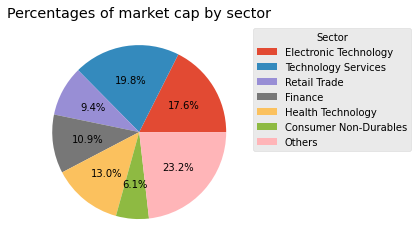

In [236]:
sumMarketCapBySector = []
for sector in sectors:
    sumMarketCapBySector.append(data.loc[data['Sector'] == sector, 'Market cap'].sum())

percentages = np.array(sumMarketCapBySector) / sum(sumMarketCapBySector)
d = dict(map(lambda i,j : (i,j) , sectors, percentages))
d['Others'] = 0.0
threshold = 0.05
others = []
for k in d:
    if (d[k] < threshold):
        d['Others'] += d[k]
        others.append(k)

for sector in others:
    d.pop(sector)

plt.pie(d.values(), autopct="%1.1f%%")
plt.legend(labels = d.keys(), title = "Sector", bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('Percentages of market cap by sector')
plt.show()

Khi biểu diễn vốn hoá bằng biểu đồ tròn, ta thấy lượng vốn hoá chiếm nhiều nhất ở các ngành như Electronic Technology, Technology Services, Health Technology hay Finance. Đây đồng thời cũng là 4 ngành có số lượng nhiều nhất trong danh sách này. Tuy số lượng công ty trong ngành Finance lớn hơn 3 ngành còn lại, nhưng lượng vốn hoá của các công ty Electronic Technology hay Technology Services tỏ ra vượt trội (gần như gấp đôi).

### 1.3 Cấu trúc giá trị giao dịch trong ngày gần nhất

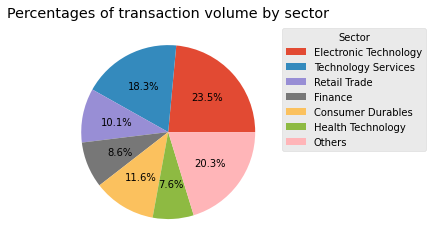

In [237]:
totalVolume1DBySector = []
for sector in sectors:
    totalVolume1DBySector.append(data.loc[data['Sector'] == sector, 'Volume * Price 1D'].sum())

percentages = np.array(totalVolume1DBySector) / sum(totalVolume1DBySector)
d = dict(map(lambda i,j : (i,j) , sectors, percentages))
d['Others'] = 0.0
threshold = 0.05
others = []
for k in d:
    if (d[k] < threshold):
        d['Others'] += d[k]
        others.append(k)

for sector in others:
    d.pop(sector)

plt.pie(d.values(), autopct="%1.1f%%")
plt.legend(labels = d.keys(), title = "Sector", bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('Percentages of transaction value by sector')
plt.show()

Có thể thấy, thể hiện của giá trị lượng giao dịch gần đây của các ngành cũng khá tương ứng với cấu trúc vốn hoá, ngoại trừ 2 ngành Consumer Durables và Health Technology đổi chỗ cho nhau. 

### 1.4 Độ trung bình thay đổi của giá trên từng ngành

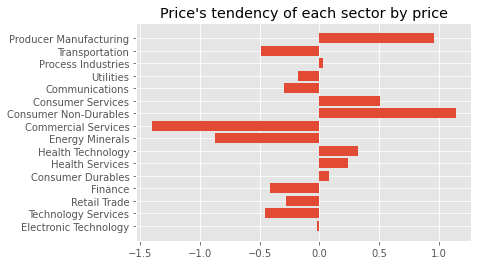

In [238]:
# Visualize the relationship between price and volume
priceTendencyBySector = []
for sector in sectors:
    priceTendencyBySector.append(data.loc[data['Sector'] == sector, 'Chg % 1D'].sum() 
        / len(data.loc[data['Sector'] == sector]))

plt.barh(sectors, priceTendencyBySector)
plt.title("Price's tendency of each sector based on change in price")
plt.show()


In [239]:
data.loc[data['Sector'] == 'Commercial Services']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
9,V,Visa Inc.,448747.0,217.66,0.30,0.66,5.133,1117.000,26500,Commercial Services
16,MA,Mastercard Incorporated,346183.0,360.06,-0.21,-0.74,2.016,725.732,24000,Commercial Services
69,SPGI,S&P Global Inc.,117223.0,359.80,-0.77,-2.78,2.026,729.114,22850,Commercial Services
91,PYPL,"PayPal Holdings, Inc.",85114.0,74.66,-4.93,-3.87,24.238,1810.000,30900,Commercial Services


In [240]:
data.loc[data['Sector'] == 'Producer Manufacturing']

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
52,HON,Honeywell International Inc.,147292.0,219.08,0.78,1.69,2.194,480.718,99000,Producer Manufacturing
65,CAT,"Caterpillar, Inc.",122884.0,236.13,0.19,0.44,2.218,523.800,107700,Producer Manufacturing
80,GE,General Electric Company,94931.0,86.88,1.90,1.62,4.480,389.260,168000,Producer Manufacturing


### 1.5 Biểu đồ phân bố lượng lao động

{'whiskers': [<matplotlib.lines.Line2D at 0x25dc8952e90>,
 'caps': [<matplotlib.lines.Line2D at 0x25dc8953430>,
 'boxes': [<matplotlib.lines.Line2D at 0x25dc8952bc0>],
 'medians': [<matplotlib.lines.Line2D at 0x25dc89539d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25dc8953ca0>],
 'means': []}

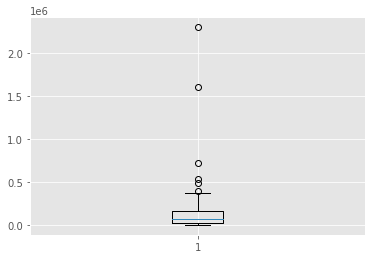

In [241]:
values = data['Employees'].values.tolist()
plt.boxplot(values)

Chúng ta có thể thấy có 6 điểm vượt ngoài biên trên của dữ liệu, chúng ta có thể bỏ 6 điểm đó để vẽ histogram

In [242]:
values.sort()
print(values)

[2800, 3795, 3900, 6000, 9793, 9900, 10368, 11300, 14400, 15000, 15500, 16881, 17300, 18400, 20000, 20300, 22473, 22850, 24000, 24200, 24450, 25988, 26500, 27605, 29905, 30900, 31000, 31000, 32200, 33400, 35000, 42595, 43900, 46000, 49077, 50000, 51000, 60000, 63000, 63000, 64000, 68000, 69600, 71970, 72327, 73541, 73700, 74814, 75000, 79000, 79000, 79000, 79100, 80000, 83000, 83300, 88000, 95000, 98200, 99000, 99290, 106000, 107700, 113000, 114000, 118400, 121100, 130000, 141700, 142000, 143000, 156500, 164000, 168000, 174000, 189000, 200000, 203000, 208000, 220000, 221000, 223400, 247848, 271025, 300000, 304000, 307600, 309000, 340000, 340000, 350000, 372000, 402000, 490600, 534000, 721000, 1608000, 2300000]


In [243]:
largeEmployeesCompany = data[data['Employees'].isin(values[-6:])]
largeEmployeesCompany

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
3,AMZN,"Amazon.com, Inc.",960282.0,94.13,-1.43,-1.37,72.496,6824.000,1608000,Retail Trade
10,WMT,Walmart Inc.,415876.0,153.22,-0.10,-0.15,6.911,1059.000,2300000,Retail Trade
17,HD,"Home Depot, Inc. (The)",334283.0,327.99,0.28,0.92,3.644,1195.000,490600,Retail Trade
32,ACN,Accenture plc,199521.0,300.13,-0.89,-2.70,1.745,523.594,721000,Technology Services
41,UPS,"United Parcel Service, Inc.",163788.0,189.39,-0.42,-0.80,3.662,693.491,534000,Transportation
68,SBUX,Starbucks Corporation,120534.0,105.05,1.63,1.68,7.917,831.668,402000,Consumer Services


In [244]:
values = values[:len(values)-6]
print(values)

[2800, 3795, 3900, 6000, 9793, 9900, 10368, 11300, 14400, 15000, 15500, 16881, 17300, 18400, 20000, 20300, 22473, 22850, 24000, 24200, 24450, 25988, 26500, 27605, 29905, 30900, 31000, 31000, 32200, 33400, 35000, 42595, 43900, 46000, 49077, 50000, 51000, 60000, 63000, 63000, 64000, 68000, 69600, 71970, 72327, 73541, 73700, 74814, 75000, 79000, 79000, 79000, 79100, 80000, 83000, 83300, 88000, 95000, 98200, 99000, 99290, 106000, 107700, 113000, 114000, 118400, 121100, 130000, 141700, 142000, 143000, 156500, 164000, 168000, 174000, 189000, 200000, 203000, 208000, 220000, 221000, 223400, 247848, 271025, 300000, 304000, 307600, 309000, 340000, 340000, 350000, 372000]


(array([31., 18., 15.,  7.,  4.,  7.,  1.,  1.,  4.,  4.]),
 array([  2800.,  39720.,  76640., 113560., 150480., 187400., 224320.,
        261240., 298160., 335080., 372000.]),
 <BarContainer object of 10 artists>)

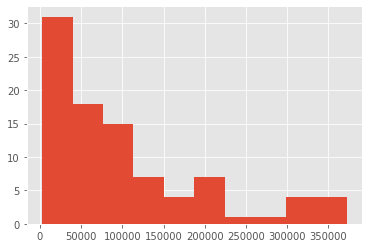

In [245]:
plt.hist(values)

## 2. Dữ liệu về giá của 10 mã thuộc các công ty có vốn hoá đứng đấu thị trường

In [246]:
data.head(10)

,Symbol,Company Name,Market cap,Price,Chg % 1D,Chg 1D,Vol 1D,Volume * Price 1D,Employees,Sector
0,AAPL,Apple Inc,2351000.0,147.81,-0.34,-0.50,65.446000,9674.0,164000,Electronic Technology
1,MSFT,Microsoft Corp.,1901000.0,255.02,0.13,0.33,21.528000,5490.0,221000,Technology Services
2,GOOG,Alphabet Inc (Google) Class C,1303000.0,100.83,-0.44,-0.45,18.821000,1898.0,156500,Technology Services
3,AMZN,"Amazon.com, Inc.",960282.0,94.13,-1.43,-1.37,72.496000,6824.0,1608000,Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,696418.0,477402.98,0.07,317.98,0.002794,1334.0,372000,Finance
5,TSLA,"Tesla, Inc.",615320.0,194.86,0.08,0.16,73.645000,14350.0,99290,Consumer Durables
6,UNH,UnitedHealth Group Incorporated,500961.0,536.16,-0.14,-0.75,2.346000,1258.0,350000,Health Services
7,JNJ,Johnson & Johnson,467679.0,178.88,0.08,0.14,5.824000,1042.0,141700,Health Technology
8,XOM,Exxon Mobil Corporation,452436.0,109.86,-0.85,-0.94,15.248000,1675.0,63000,Energy Minerals
9,V,Visa Inc.,448747.0,217.66,0.30,0.66,5.133000,1117.0,26500,Commercial Services


In [247]:
tickers = data["Symbol"].loc[:9].to_list()
for i in range(len(tickers)):
    if (tickers[i] == 'BRK.A'):
        tickers[i] = 'BRK-A'
tickers

['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BRK-A', 'TSLA', 'UNH', 'JNJ', 'XOM', 'V']

In [248]:
priceData = pd.read_csv("price.csv", index_col='Date')
priceData


,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL
...,...,...,...,...,...,...,...
2022-11-28,212.259995,214.470001,210.649994,211.259995,211.259995,10229400,V
2022-11-29,209.350006,210.149994,207.350006,209.059998,209.059998,8986900,V
2022-11-30,208.220001,217.000000,208.009995,217.000000,217.000000,13918100,V


In [249]:
convert_types = {
    'Open': float,
    'High': float,
    'Low': float,
    'Close': float,
    'Adj Close': float,
    'Volume': int
}
priceData = priceData.astype(convert_types)
priceData.describe(include='all')

,Open,High,Low,Close,Adj Close,Volume,Ticker
count,10078.000000,10078.000000,10078.000000,10078.000000,10078.000000,1.007800e+04,10078
unique,NaN,NaN,NaN,NaN,NaN,NaN,10
top,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
freq,NaN,NaN,NaN,NaN,NaN,NaN,1008
mean,37085.295141,37359.278765,36764.918151,37057.989667,37055.074308,4.312804e+07,NaN
std,112928.554393,113757.065416,111928.902689,112828.478290,112829.431246,5.896634e+07,NaN
min,12.073333,12.445333,11.799333,11.931333,11.931333,1.000000e+02,NaN
25%,93.465624,94.657915,92.300003,93.464876,93.206598,5.933925e+06,NaN
50%,159.102249,160.725998,157.154999,159.144997,156.299507,2.160910e+07,NaN
75%,245.997501,248.790001,242.914997,246.022499,240.218014,6.277875e+07,NaN


In [254]:
priceData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10078 entries, 2018-12-03 to 2022-12-02
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10078 non-null  float64
 1   High       10078 non-null  float64
 2   Low        10078 non-null  float64
 3   Close      10078 non-null  float64
 4   Adj Close  10078 non-null  float64
 5   Volume     10078 non-null  int32  
 6   Ticker     10078 non-null  object 
dtypes: float64(5), int32(1), object(1)
memory usage: 590.5+ KB


In [250]:
priceDataArray = []
for i in range(0, len(tickers)):
    priceDataArray.append(priceData.loc[priceData['Ticker'] == tickers[i]])

In [251]:
priceDataDict = dict(map(lambda i,j : (i,j) , tickers, priceDataArray))
priceDataDict['AAPL']

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL
...,...,...,...,...,...,...,...
2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000,AAPL
2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800,AAPL
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111380900,AAPL


## Giải thích ý nghĩa các cột

+ `Date`: Ngày giao dịch
+ `Open`: Giá bắt đầu phiên giao dịch của mã trong ngày 
+ `High`: Giá cao nhất trong phiên giao dịch
+ `Low`: Giá thấp nhất trong phiên giao dịch
+ `Close`:  Giá đóng của phiên giao dịch
+ `Adj Close`: Giá đóng có điều chỉnh của phiên giao dịch
+ `Volume`: Lượng giao dịch trong ngày
+ `Ticker`: Mã chứng khoán

### 2.1 Biểu diễn giá của các mã trong 4 năm gần nhất

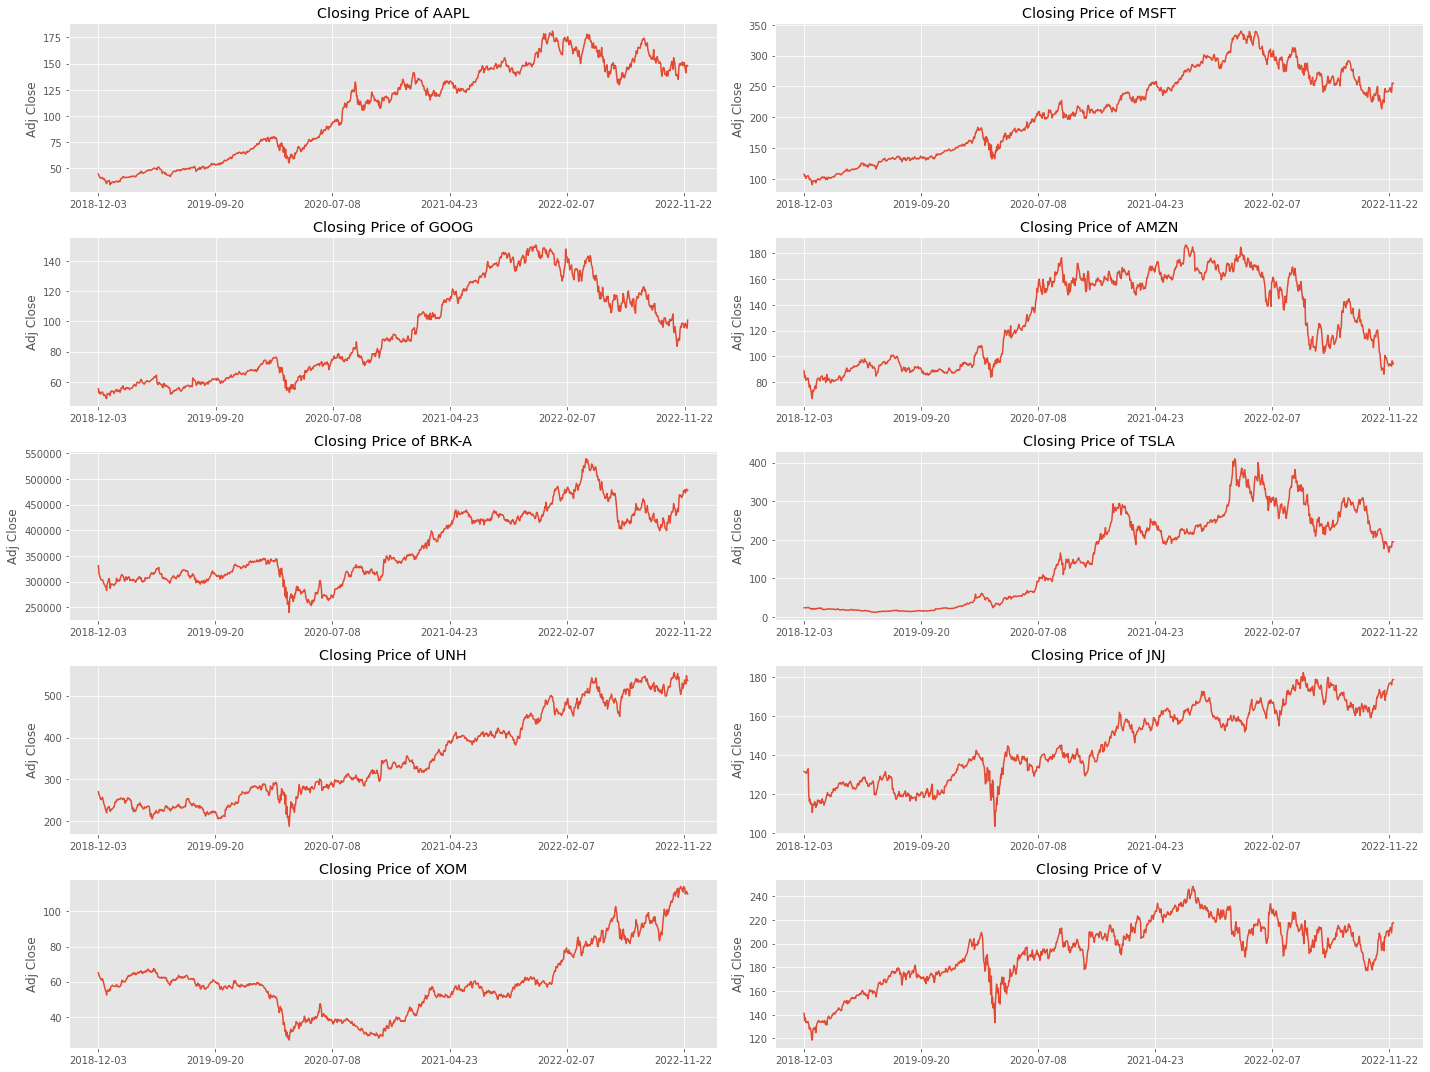

In [252]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(priceDataDict.values(), 1):
    plt.subplot(5, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tickers[i - 1]}")
    
plt.tight_layout()

### 2.2 Thống kê lượng giao dịch trên dòng thời gian

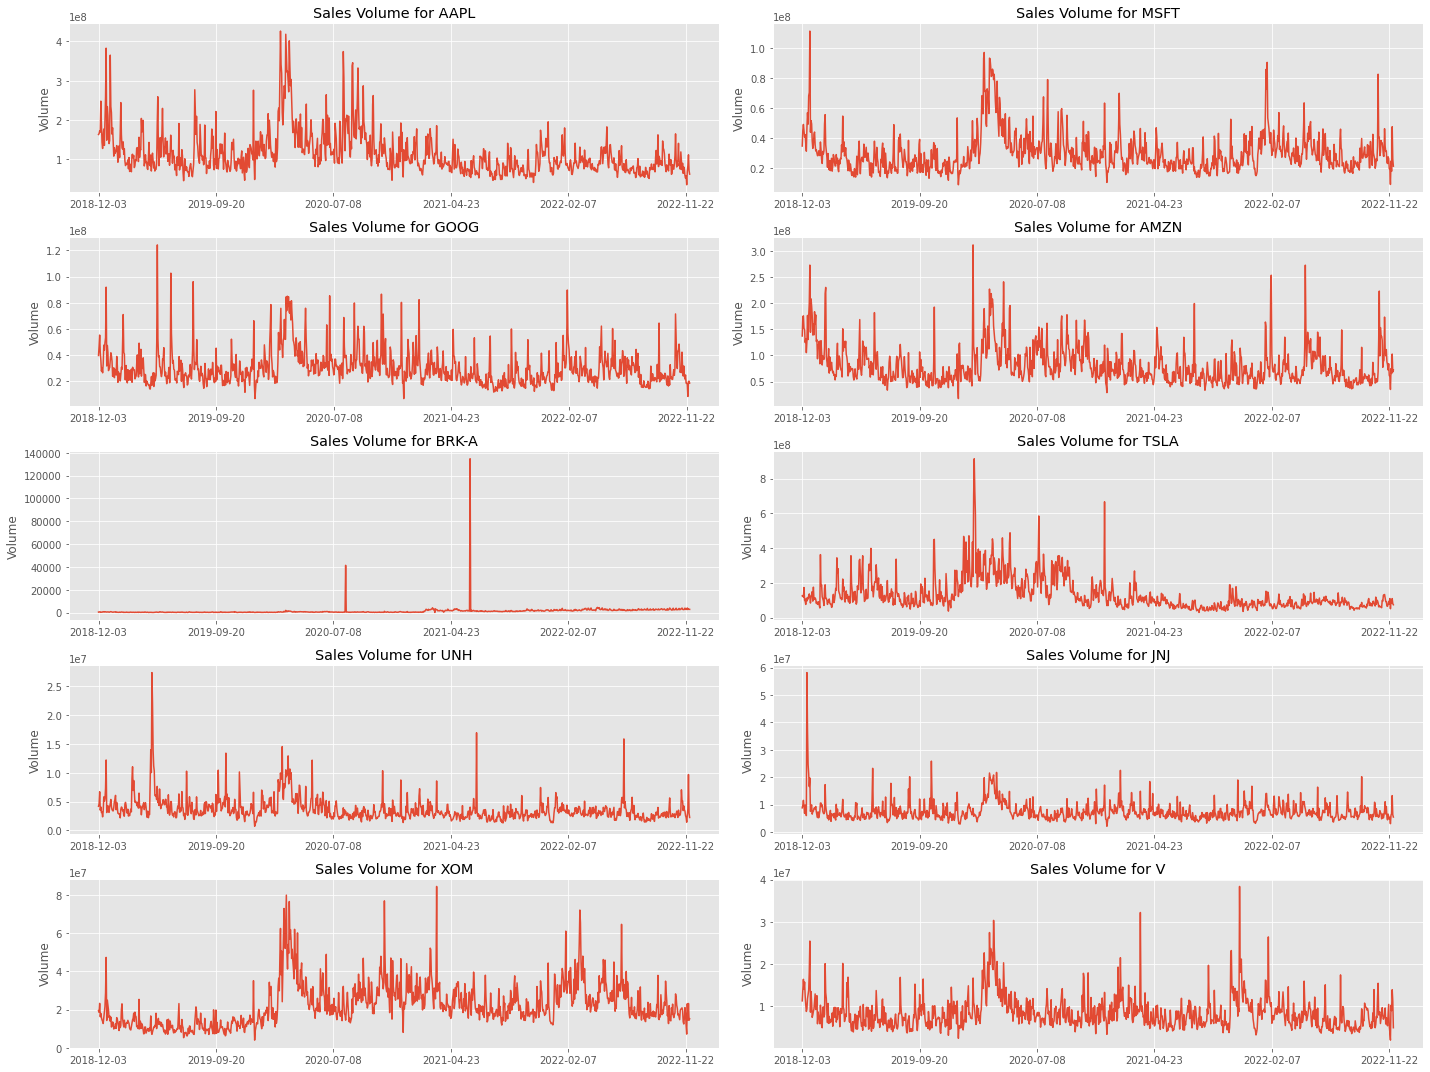

In [255]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(priceDataArray, 1):
    plt.subplot(5, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    # plt.xlim(min(company['Volume']), max(company['Volume']))
    plt.title(f"Sales Volume for {tickers[i - 1]}")
    
plt.tight_layout()

## 2.3 Biểu diễn meaning average 

In [260]:
ma_day = [30, 60, 120]

for ma in ma_day:
    for company in priceDataDict.values():
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

priceData = priceDataDict.values()

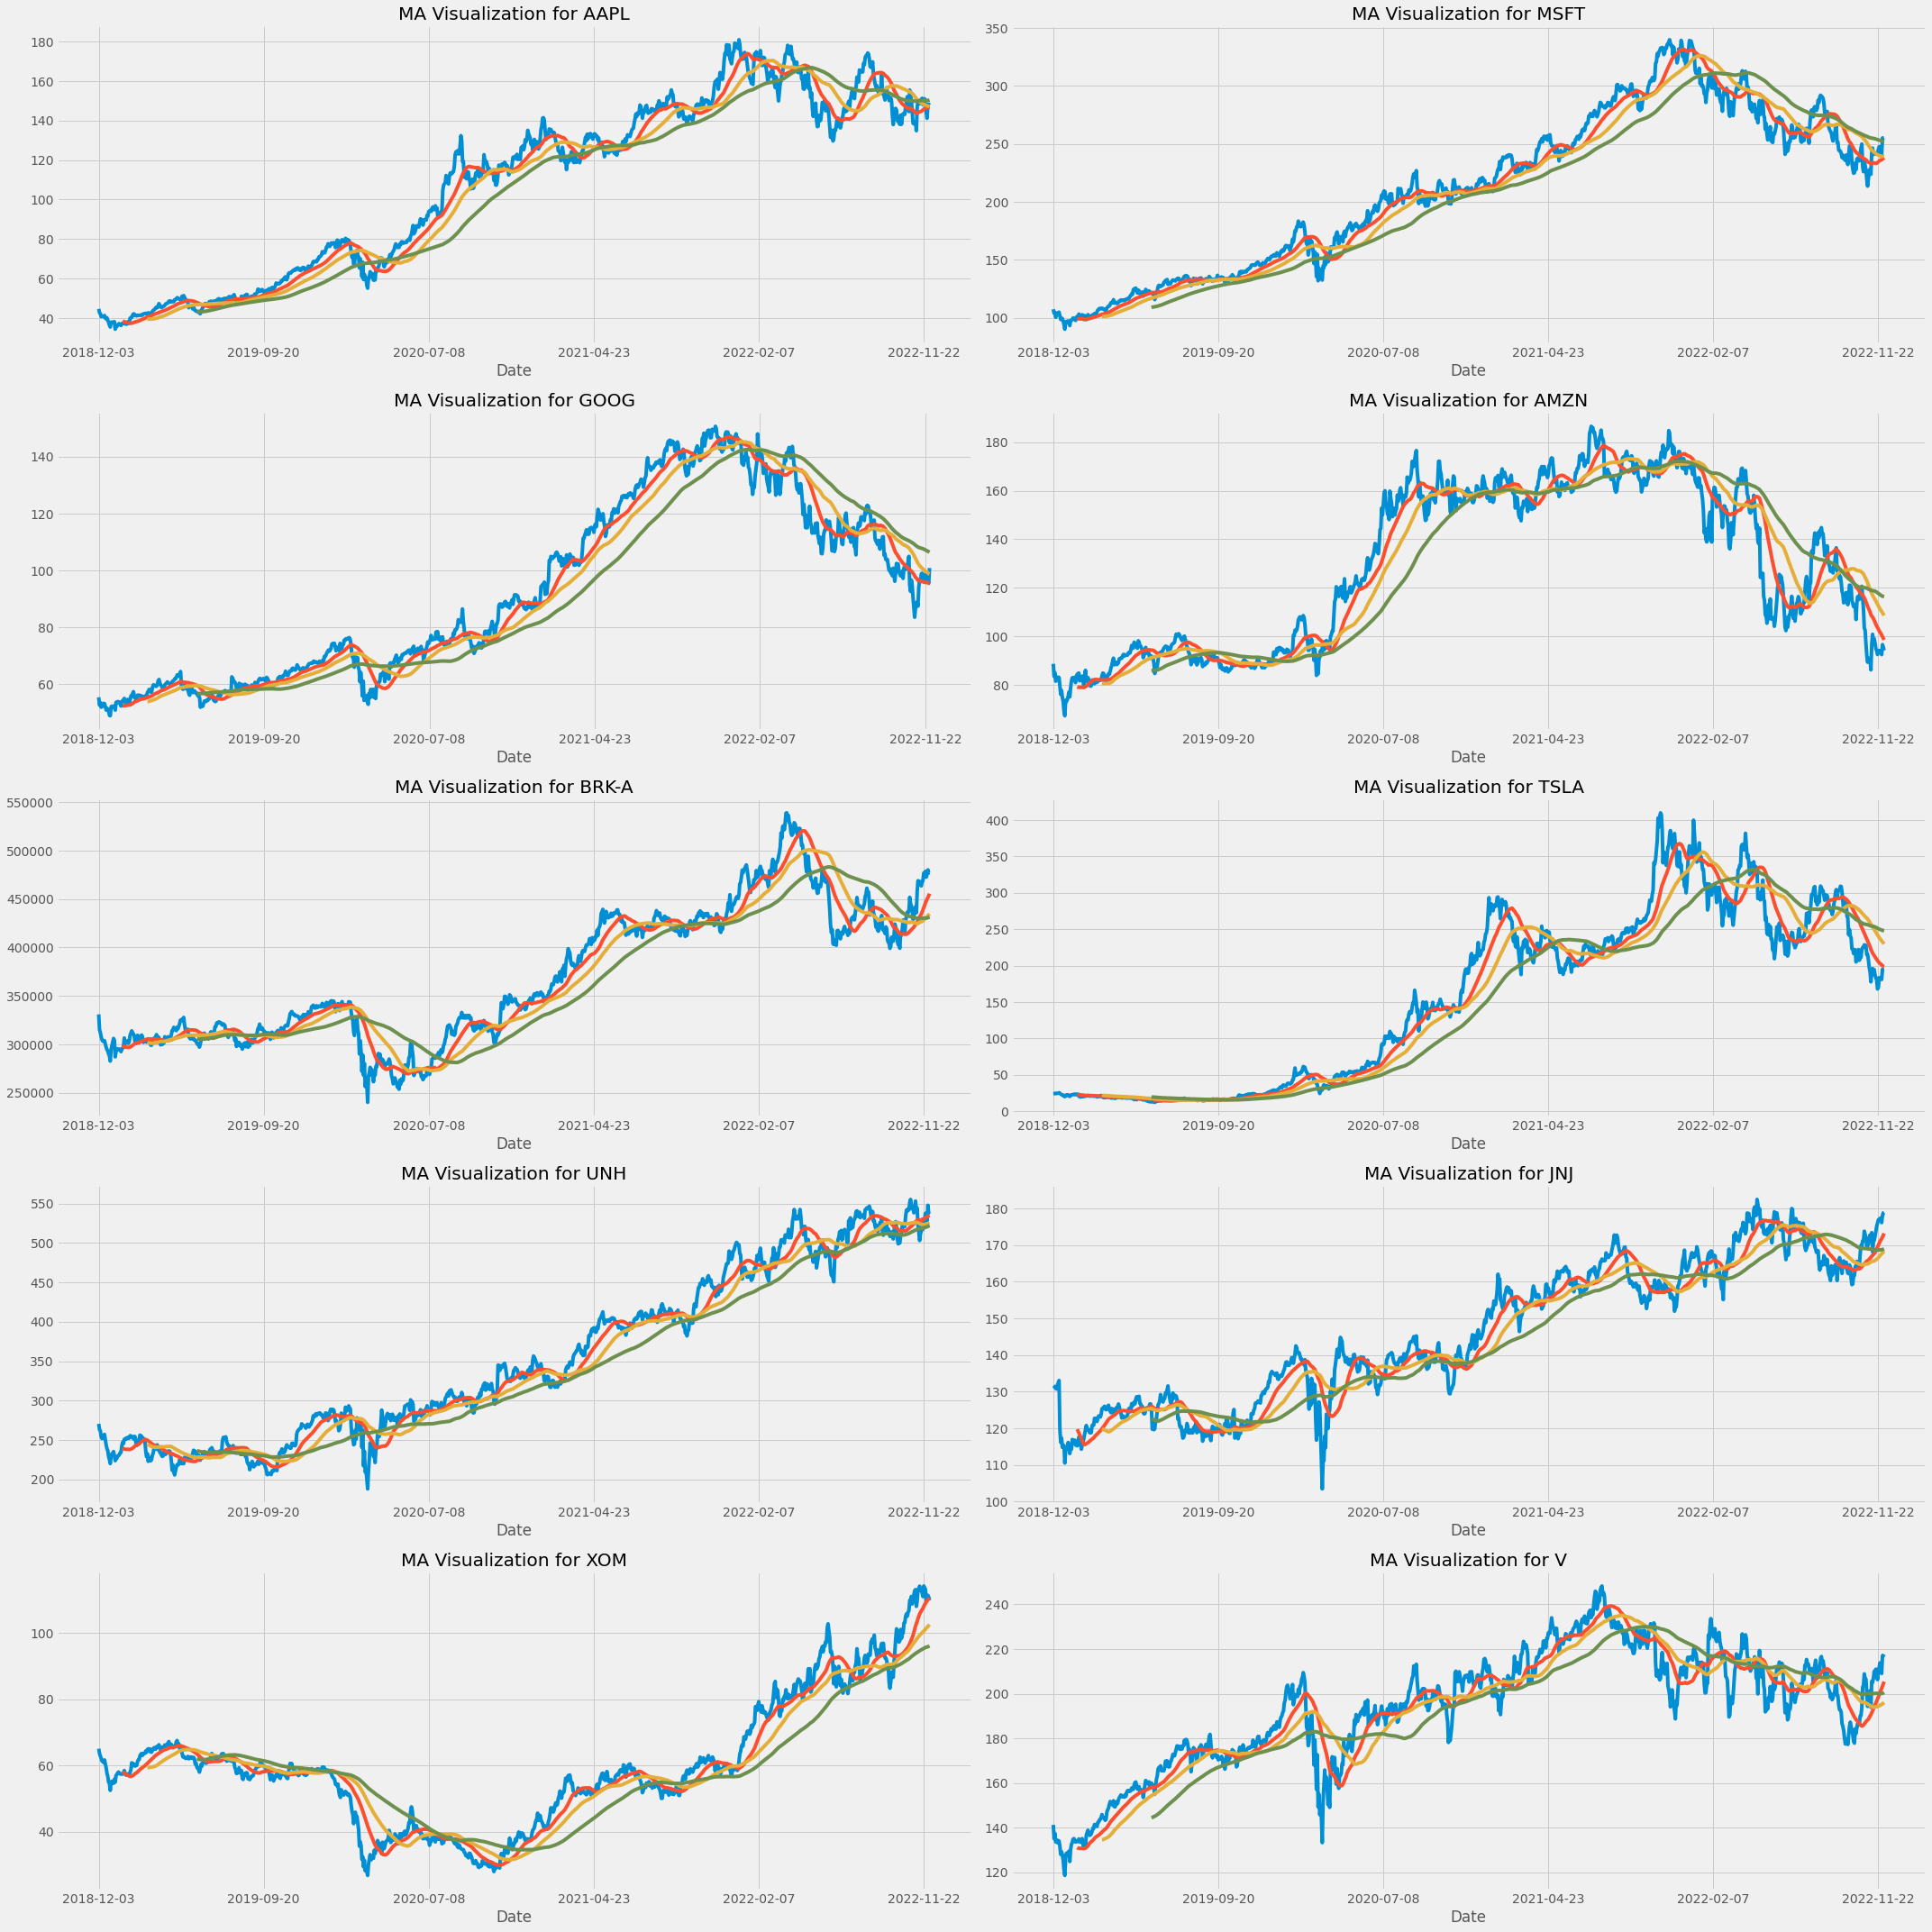

In [261]:
plt.figure(figsize=(30, 30))
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.style.use('fivethirtyeight')

for i, company in enumerate(priceData, 1):
    # fig = plt.figure()
    # ax = fig.add_axes()
    plt.subplot(5, 2, i)
    ax = company['Adj Close'].plot()
    for ma in ma_day:
        ax = company[f'MA for {ma} days'].plot()
    plt.title(f"MA Visualization for {tickers[i - 1]}")

plt.tight_layout()
plt.show()


### 2.4 Biểu diễn tương quan giữa các mã chứng khoán